In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime

In [2]:
filename = "stateTaxes.xlsx"
state_taxes = pd.read_excel(filename, parse_dates = True)
state_taxes = state_taxes[state_taxes["State"] != 0.0]
tax_names = state_taxes.iloc[0]
state_taxes = state_taxes.iloc[1:]
state_taxes["Year"] = pd.to_datetime(state_taxes["Year"].astype(int), format = "%Y")
state_taxes["Name"] = state_taxes["Name"].str[:2]
tax_names = tax_names.iloc[4:]
state_taxes.rename(columns = {taxid:taxname for taxid, taxname in tax_names.items()}, inplace = True)
state_taxes = state_taxes.replace("X","0").replace("T0", "TX")
for key in tax_names:
    state_taxes[key] = state_taxes[key].astype(int)
state_taxes[state_taxes[tax_names]<0] = 0

state_taxes.set_index(["Name", "Year"], inplace = True)
state_taxes

,,State,FY Ending Date,Total Taxes,Property Tax (T01),Tot Sales & Gr Rec Tax,Total Gen Sales Tax (T09),Total Select Sales Tax,Alcoholic Beverage Tax (T10),Amusement Tax (T11),Insurance Premium Tax (T12),...,Occup and Bus Lic NEC (T28),Other License Taxes (T29),Total Income Taxes,Individual Income Tax (T40),Corp Net Income Tax (T41),Total Other Taxes,Death and Gift Tax (T50),Docum and Stock Tr Tax (T51),Severance Tax (T53),Taxes NEC (T99)
Name,Year,,,,,,,,,,,,,,,,,,,,,
AL,2023-01-01,1.0,93023.0,16713126,553812,7952183,4607610,3344573,282537,0,563244,...,70795,1,7470605,5910871,1559734,111783,0,57424,54359,0
AK,2023-01-01,2.0,63023.0,3271369,128961,292255,0,292255,41621,21369,63446,...,16252,10092,444240,0,444240,2296473,0,0,2296473,0
AZ,2023-01-01,3.0,63023.0,23363426,1304903,14862923,12509337,2353586,91425,8152,811228,...,182588,2314,6323049,4779485,1543564,190828,0,0,18526,172302
AR,2023-01-01,4.0,63023.0,12758766,1424090,6668614,4980130,1688484,78615,92034,374949,...,135129,1120,3985931,3147770,838161,245911,0,73715,98360,73836
CA,2023-01-01,5.0,63023.0,220591306,3400425,75400445,53565932,21834513,421647,0,3690456,...,4013036,4364,126315948,96379294,29936654,2209603,348,0,135200,2074055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VA,1942-01-01,47.0,63042.0,65682,4884,35745,0,35745,6552,0,2133,...,0,3831,9394,3121,6273,2096,725,0,25,1346
WA,1942-01-01,48.0,33142.0,90388,4618,73516,40248,33268,2964,0,1831,...,0,1393,0,0,0,3277,3138,0,0,139
WV,1942-01-01,49.0,63042.0,56851,196,44763,30961,13802,988,0,1039,...,0,990,2474,2474,0,1196,516,0,0,680


In [3]:
years = [1985,
 1990,
 1995,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]
state_dict = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ',
    'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA','Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

fips_dict = {
 '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR',
 '06': 'CA', '08': 'CO', '09': 'CT', '10': 'DE',
 '12': 'FL', '13': 'GA', '15': 'HI', '16': 'ID',
 '17': 'IL', '18': 'IN', '19': 'IA', '20': 'KS',
 '21': 'KY', '22': 'LA', '23': 'ME', '24': 'MD',
 '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS',
 '29': 'MO', '30': 'MT', '31': 'NE', '32': 'NV',
 '33': 'NH', '34': 'NJ', '35': 'NM', '36': 'NY',
 '37': 'NC', '38': 'ND', '39': 'OH', '40': 'OK',
 '41': 'OR', '42': 'PA', '44': 'RI', '45': 'SC',
 '46': 'SD', '47': 'TN', '48': 'TX', '49': 'UT',
 '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV',
 '55': 'WI', '56': 'WY'}
# '60': 'AS', '66': 'GU',
#  '69': 'MP', '72': 'PR', '78': 'VI'}
state_df = pd.DataFrame(state_dict, index = ["Abbr"]).T
fips_df = pd.DataFrame(fips_dict, index = ["State"]).T
state_names, state_abbrev = state_df.index, list(state_df["Abbr"].values)
state_df.T# state_abbrev

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Abbr,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY


In [4]:
def gather_data(data_codes, 
                start, 
                end = datetime.datetime.today(), 
                freq = "M"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(
                val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            # setting i to None will cause the next block of code to execute,
            # placing data within df instead of creating a new dataframe for
            # each variable
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

In [5]:
data_codes  = {state: f"{state}POP" for state in state_dict.values()}
# Select start and end dates
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()

# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates
#       alternating days
pop = gather_data(data_codes = data_codes, start = start, end = end, freq = "A")
pop_panel = pop.reset_index()
pop_panel["DATE"] = pd.to_datetime(pop_panel["DATE"].astype(str).str[:4].astype(int), format = "%Y")
pop_panel = pop_panel.melt(id_vars=["DATE"], 
        var_name="State", 
        value_name="Population").set_index(["State", "DATE"]).round(2)
pop_panel

Population
State DATE                  
AL    2002-01-01     4480.09
      2003-01-01     4503.49
      2004-01-01     4530.73
      2005-01-01     4569.80
      2006-01-01     4628.98
...                      ...
WY    2019-01-01      580.12
      2020-01-01      577.66
      2021-01-01      579.55
      2022-01-01      581.63
      2023-01-01      584.06

[1100 rows x 1 columns]

In [6]:

storage_options = {'User-Agent': 'Mozilla/5.0'}
url = "https://www.fraserinstitute.org/sites/default/files/economic-freedom-of-north-america-2022-for-website-allgovs.xlsx"
efw = pd.read_excel(url, storage_options=storage_options, sheet_name=None)
efw = efw["Overall-scores(allgovs)"].dropna(subset = "Unnamed: 104").rename(columns = {"Overall allg Scores":"State"})


In [7]:
panel = efw[efw["Unnamed: 104"].str.contains(", US")]
panel = panel[["State"] + years]
panel["State"] = panel["State"].apply(lambda x:state_dict[x])
panel = panel.melt(id_vars=["State"], 
        var_name="Year", 
        value_name="EFW")
panel["Year"] = pd.to_datetime(panel["Year"],format = "%Y")
panel = panel.set_index(["State", "Year"]).round(2)
panel

,,EFW
State,Year,
AL,1985-01-01,8.22
AK,1985-01-01,8.04
AZ,1985-01-01,8.25
AR,1985-01-01,8.20
CA,1985-01-01,8.07
...,...,...
VA,2020-01-01,7.94
WA,2020-01-01,7.90
WV,2020-01-01,7.87


In [8]:
GDP = pd.read_csv("StateGDP.csv")#.rename(columns = {year:datetime.datetime(int(year),1,1) for year in GDP.keys()[8:]})
GDP_years = list(GDP.keys())[-24:]
GDP = GDP[GDP["GeoName"].isin(state_names)]
GDP["State"] = GDP["GeoName"].apply(lambda x: state_dict[x])
GDP = GDP[["State","LineCode"] + GDP_years]
GDP = GDP.melt(id_vars=["State", "LineCode"], 
        var_name="Year", 
        value_name="GDP")
GDP["Year"] = pd.to_datetime(GDP["Year"], format = "%Y")

GDP.set_index(["State", "Year"], inplace = True)
panel.loc[panel.index.isin(GDP.index),"GDP"] = GDP["GDP"][GDP["LineCode"]==1].astype(float)
panel

,,EFW,GDP
State,Year,,
AL,1985-01-01,8.22,NaN
AK,1985-01-01,8.04,NaN
AZ,1985-01-01,8.25,NaN
AR,1985-01-01,8.20,NaN
CA,1985-01-01,8.07,NaN
...,...,...,...
VA,2020-01-01,7.94,551760.3
WA,2020-01-01,7.90,618704.9
WV,2020-01-01,7.87,73709.2


In [9]:
panel["Population"] = pop_panel["Population"]
# for taxname, taxval in state_taxes[tax_names].items():
#     panel[taxname] = taxval
tax_panel = state_taxes.copy()
for name, val in panel.items():
    tax_panel[name] = val

In [19]:
pct_state_taxes = state_taxes.copy()
pct_state_taxes[tax_names] = pct_state_taxes[tax_names].apply(lambda x: x.div(pct_state_taxes["Total Taxes"]))
pct_state_taxes

,,State,FY Ending Date,Total Taxes,Property Tax (T01),Tot Sales & Gr Rec Tax,Total Gen Sales Tax (T09),Total Select Sales Tax,Alcoholic Beverage Tax (T10),Amusement Tax (T11),Insurance Premium Tax (T12),...,Occup and Bus Lic NEC (T28),Other License Taxes (T29),Total Income Taxes,Individual Income Tax (T40),Corp Net Income Tax (T41),Total Other Taxes,Death and Gift Tax (T50),Docum and Stock Tr Tax (T51),Severance Tax (T53),Taxes NEC (T99)
Name,Year,,,,,,,,,,,,,,,,,,,,,
AL,2023-01-01,1.0,93023.0,1.0,0.033136,0.475805,0.275688,0.200117,0.016905,0.000000,0.033701,...,0.004236,5.983321e-08,0.446990,0.353666,0.093324,0.006688,0.000000,0.003436,0.003252,0.000000
AK,2023-01-01,2.0,63023.0,1.0,0.039421,0.089337,0.000000,0.089337,0.012723,0.006532,0.019394,...,0.004968,3.084947e-03,0.135796,0.000000,0.135796,0.701991,0.000000,0.000000,0.701991,0.000000
AZ,2023-01-01,3.0,63023.0,1.0,0.055852,0.636162,0.535424,0.100738,0.003913,0.000349,0.034722,...,0.007815,9.904369e-05,0.270639,0.204571,0.066068,0.008168,0.000000,0.000000,0.000793,0.007375
AR,2023-01-01,4.0,63023.0,1.0,0.111617,0.522669,0.390330,0.132339,0.006162,0.007213,0.029388,...,0.010591,8.778278e-05,0.312407,0.246714,0.065693,0.019274,0.000000,0.005778,0.007709,0.005787
CA,2023-01-01,5.0,63023.0,1.0,0.015415,0.341811,0.242829,0.098982,0.001911,0.000000,0.016730,...,0.018192,1.978319e-05,0.572624,0.436913,0.135711,0.010017,0.000002,0.000000,0.000613,0.009402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VA,1942-01-01,47.0,63042.0,1.0,0.074358,0.544213,0.000000,0.544213,0.099753,0.000000,0.032475,...,0.000000,5.832648e-02,0.143022,0.047517,0.095506,0.031911,0.011038,0.000000,0.000381,0.020493
WA,1942-01-01,48.0,33142.0,1.0,0.051091,0.813338,0.445280,0.368058,0.032792,0.000000,0.020257,...,0.000000,1.541134e-02,0.000000,0.000000,0.000000,0.036255,0.034717,0.000000,0.000000,0.001538
WV,1942-01-01,49.0,63042.0,1.0,0.003448,0.787374,0.544599,0.242775,0.017379,0.000000,0.018276,...,0.000000,1.741394e-02,0.043517,0.043517,0.000000,0.021037,0.009076,0.000000,0.000000,0.011961


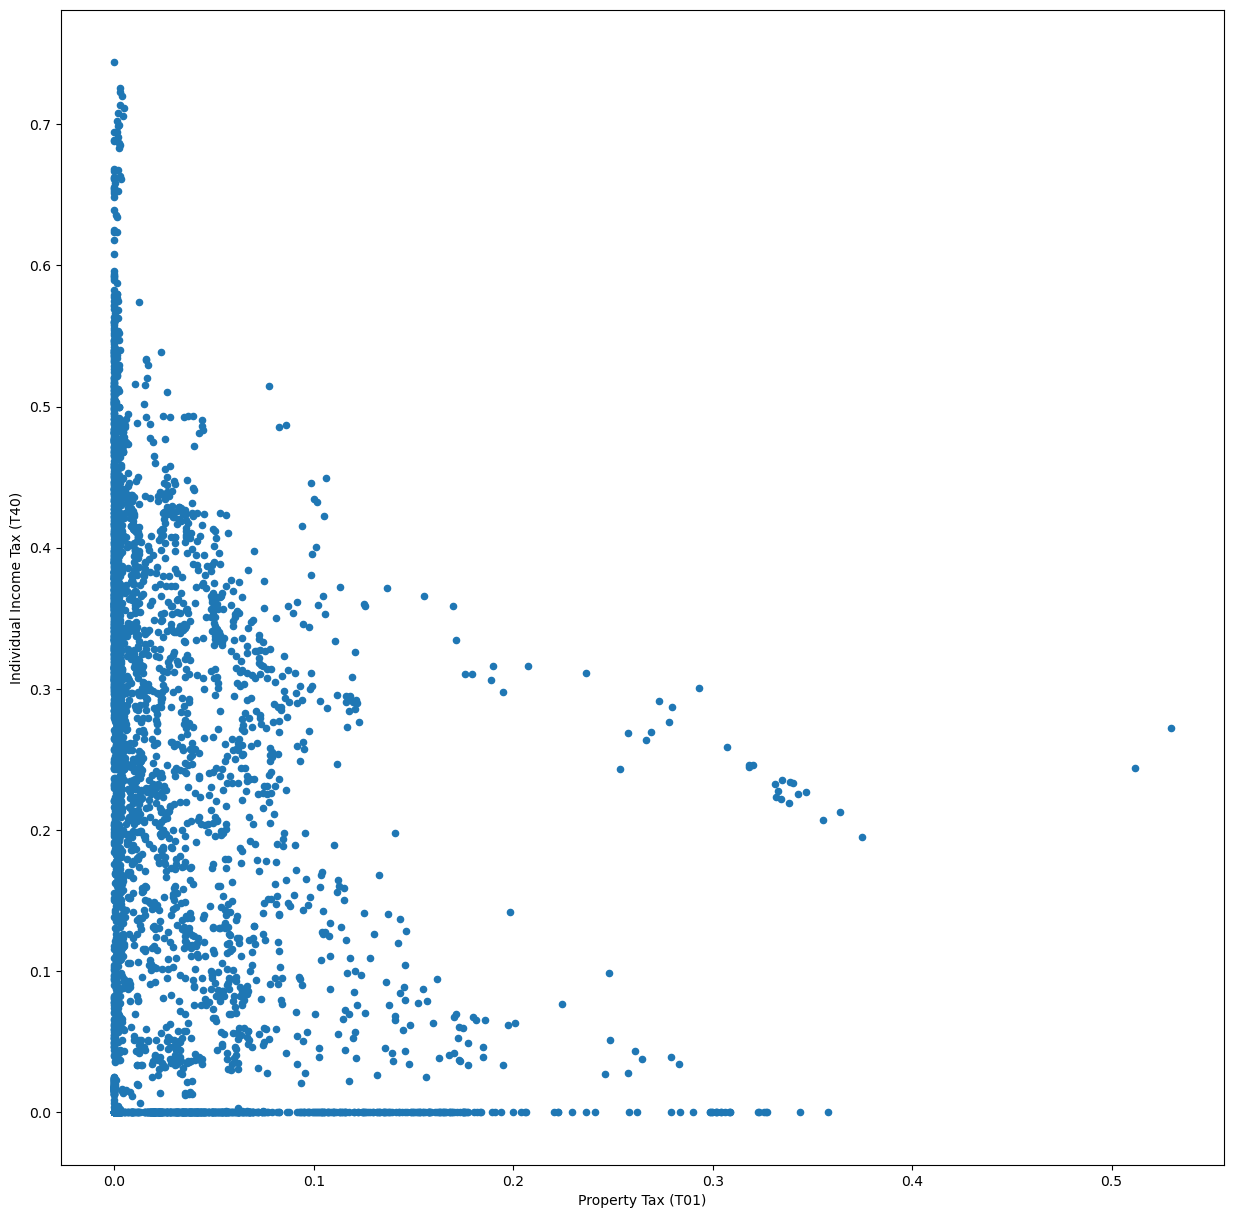

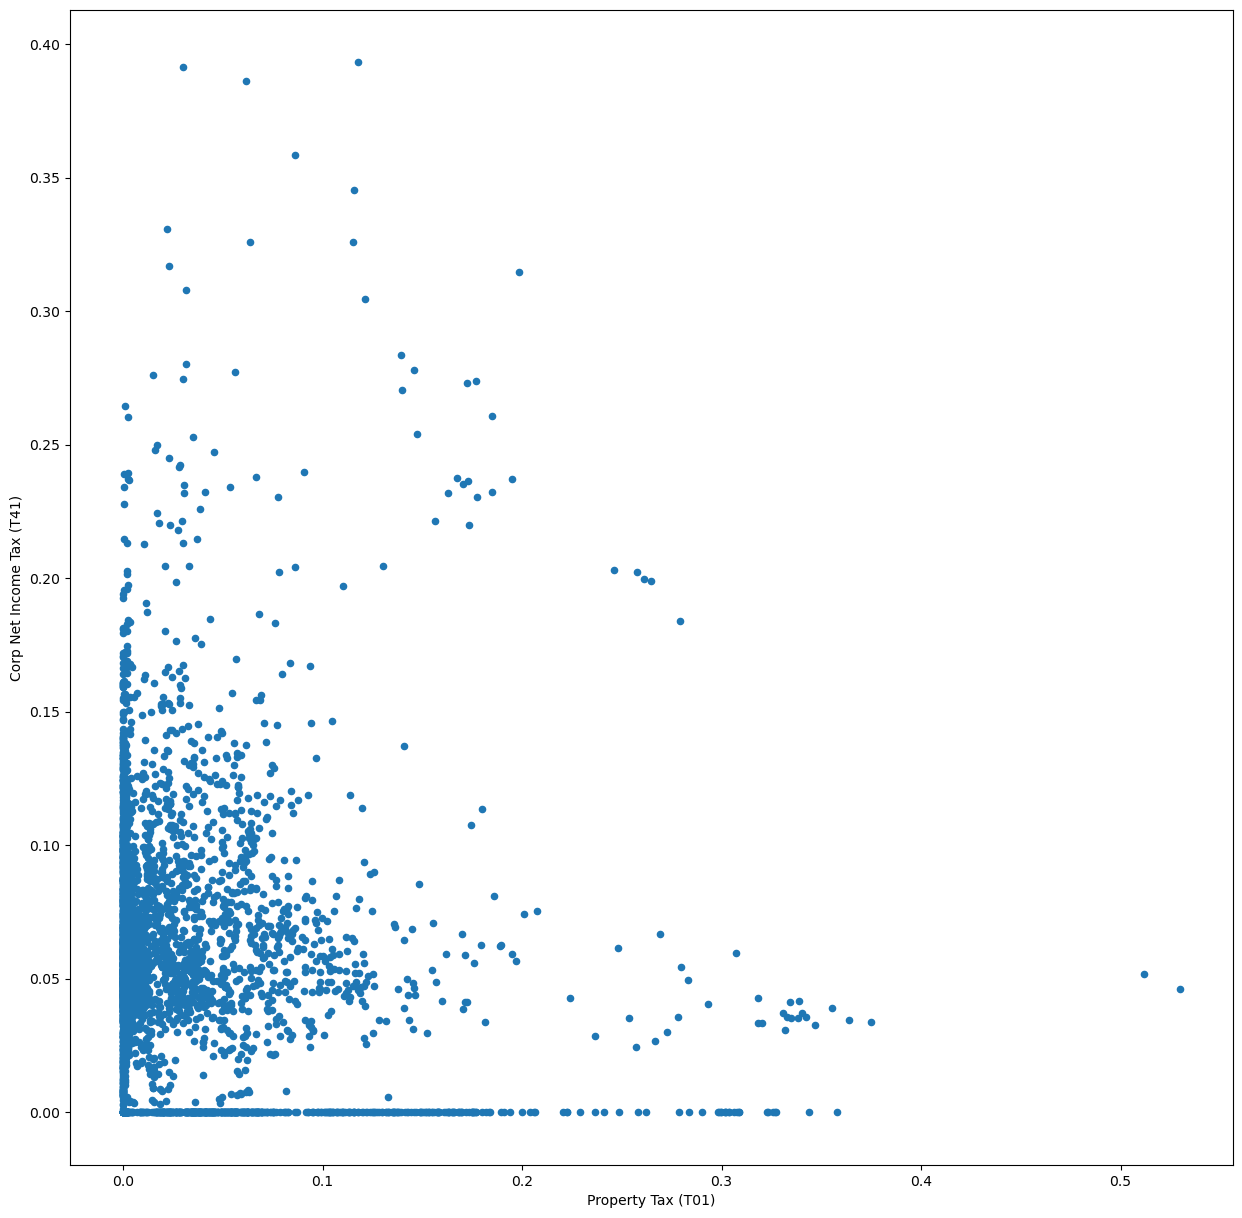

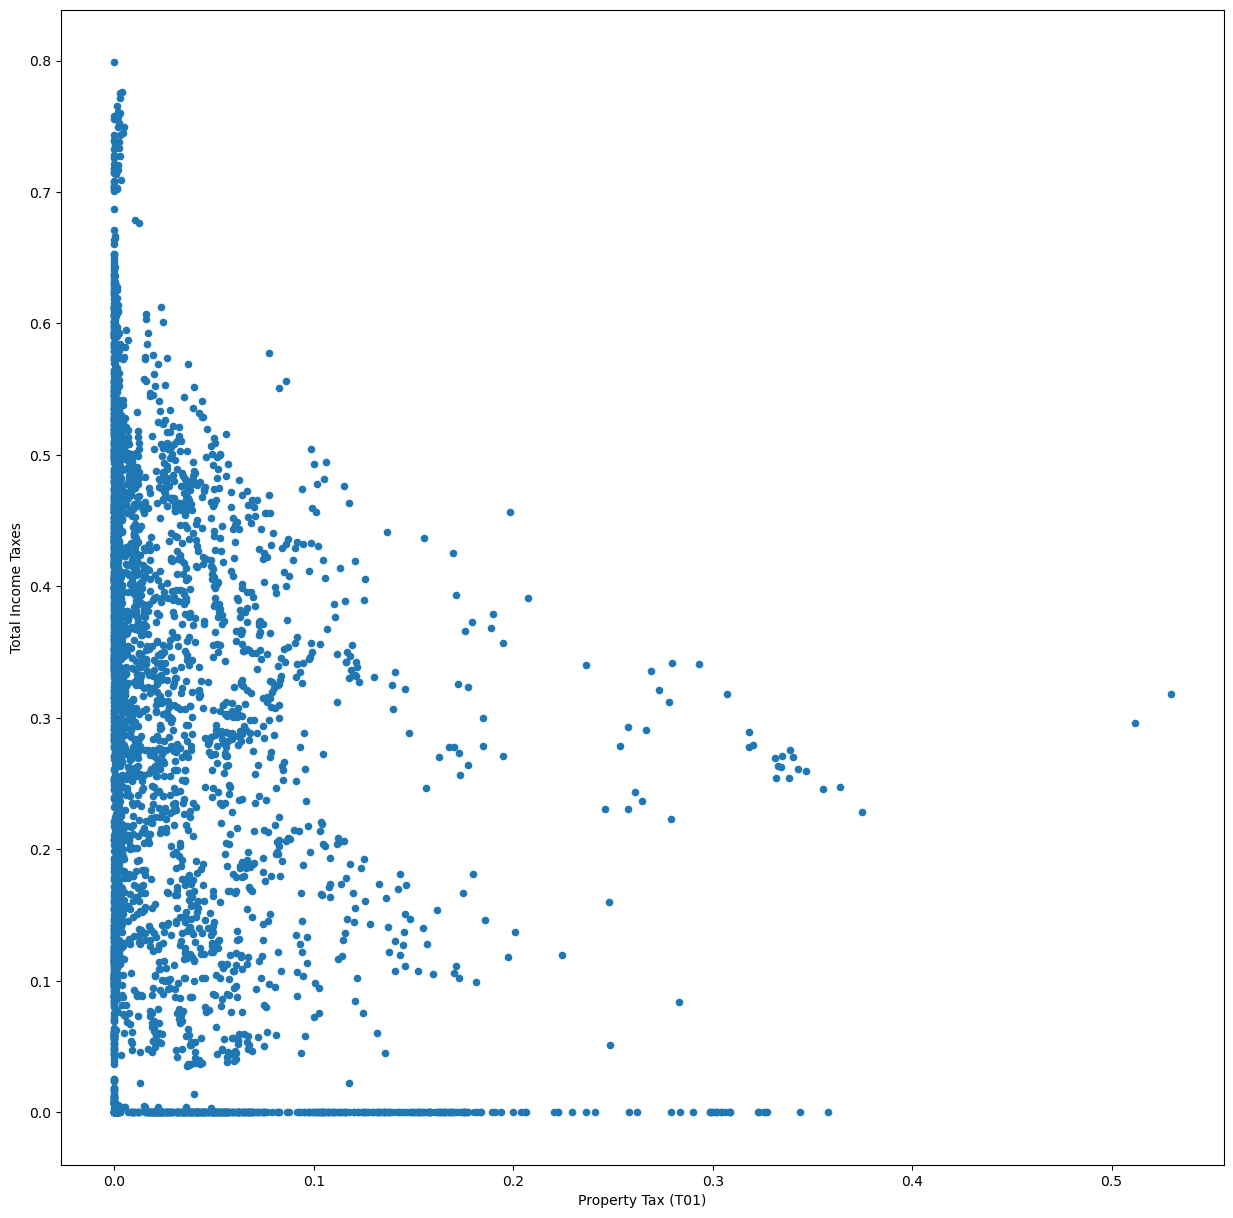

In [26]:
for income_tax in ("Individual Income Tax (T40)", "Corp Net Income Tax (T41)", "Total Income Taxes"):
    fig, ax = plt.subplots(figsize = (15,15))
    pct_state_taxes.plot.scatter(x = "Property Tax (T01)", y = income_tax, ax = ax)
    pct_state_taxes[["Property Tax (T01)", income_tax]].corr()